In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
insurance=pd.read_csv("D:/datasets/insurance.csv")

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.shape

(1338, 7)

In [6]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
insurance['sex'].replace({'male':0,'female':1},inplace=True)

In [8]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [9]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
insurance['smoker'].replace({'no':0,'yes':1},inplace=True)

In [11]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [12]:
insurance['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [14]:
insurance.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [15]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [16]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


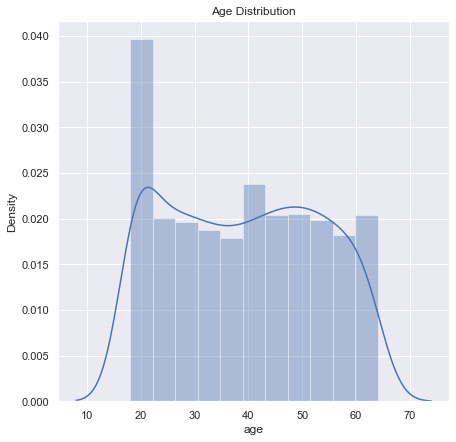

In [19]:
sns.set()
plt.figure(figsize=(7,7))
sns.distplot(insurance['age'])
plt.title('Age Distribution')
plt.show()

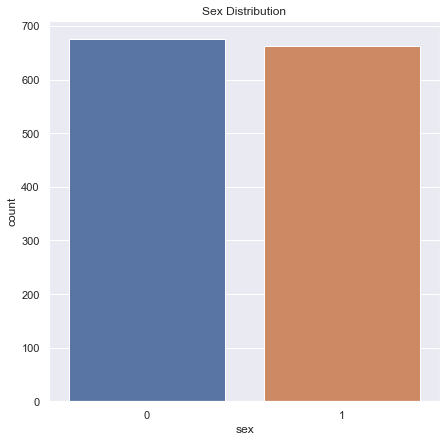

In [21]:
plt.figure(figsize=(7,7))
sns.countplot(x='sex',data=insurance)
plt.title('Sex Distribution')
plt.show()

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


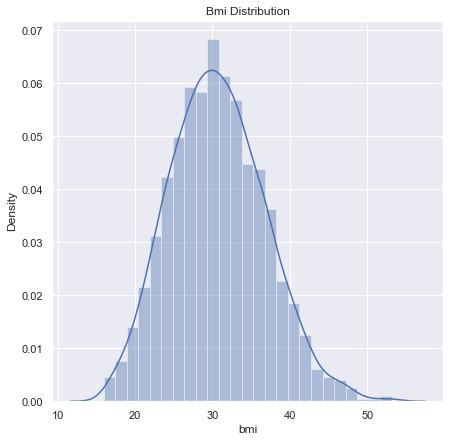

In [22]:
plt.figure(figsize=(7,7))
sns.distplot(insurance['bmi'])
plt.title('Bmi Distribution')
plt.show()

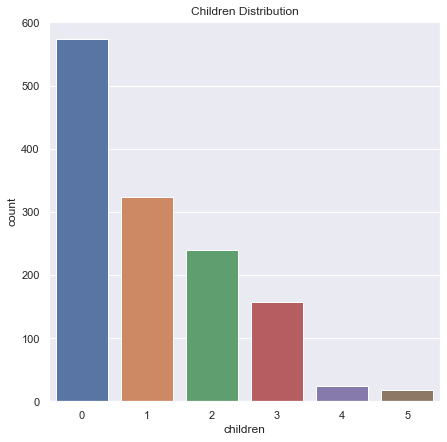

In [23]:
plt.figure(figsize=(7,7))
sns.countplot(x='children',data=insurance)
plt.title('Children Distribution')
plt.show()

In [24]:
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

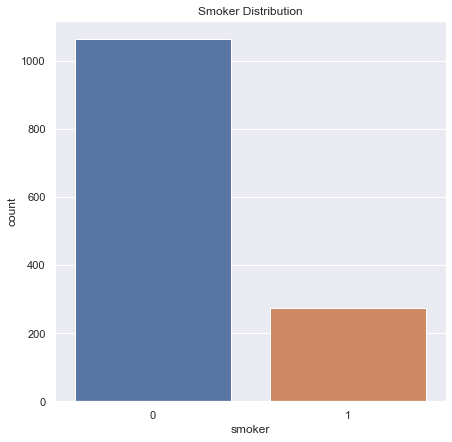

In [25]:
plt.figure(figsize=(7,7))
sns.countplot(x='smoker',data=insurance)
plt.title('Smoker Distribution')
plt.show()

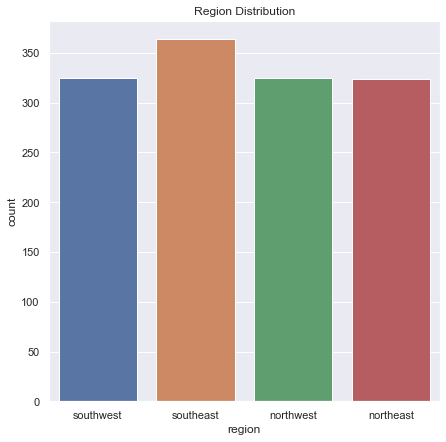

In [26]:
plt.figure(figsize=(7,7))
sns.countplot(x='region',data=insurance)
plt.title('Region Distribution')
plt.show()

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


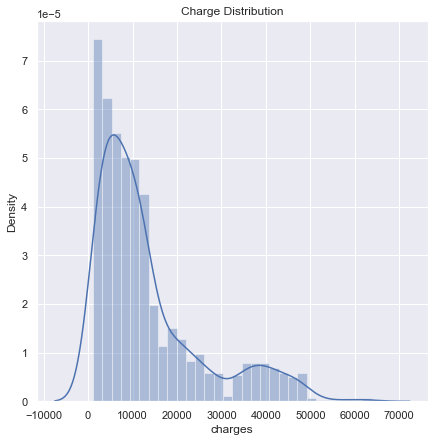

In [27]:
plt.figure(figsize=(7,7))
sns.distplot(insurance['charges'])
plt.title('Charge Distribution')
plt.show()

In [28]:
insurance['region'].replace({'southeast':0,'southwest':1,'northeast':3,'northwest':4},inplace=True)

In [29]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,4,21984.47061
4,32,0,28.880,0,0,4,3866.85520


In [30]:
X=insurance.drop('charges',axis=1)
Y=insurance['charges']

In [31]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       4
4      32    0  28.880         0       0       4
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       4
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       4

[1338 rows x 6 columns]


In [32]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [38]:
model=LinearRegression()

In [39]:
model.fit(X_train,Y_train)

LinearRegression()

In [44]:
training_prediction=model.predict(X_train)
training_prediction

array([  535.22259565,  9348.00708462, 13130.6275441 , ...,
       17279.39428331,  9525.3204517 , 13824.93517907])

In [46]:
error=metrics.r2_score(Y_train,training_prediction)
print(error)

0.7516293812348264


In [47]:
testing_prediction=model.predict(X_test)

error=metrics.r2_score(Y_test,testing_prediction)
print(error)

0.7449941035110837


In [53]:
input_data=(37,1,27.74,3,0,3)

input_data_as_array=np.asarray(input_data)

input_data_reshaped=input_data_as_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)

print(prediction)

[8160.66278284]
